In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv

In [ ]:
df = read_csv("all_month.csv")

In [ ]:
df.shape

(9186, 22)

In [ ]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2021-11-22T04:45:35.010Z,33.190167,-115.595833,1.78,1.72,ml,21.0,81.0,0.02089,0.19,...,2021-11-22T04:49:26.080Z,"9km SW of Niland, CA",earthquake,0.31,0.42,0.129,27.0,automatic,ci,ci
1,2021-11-22T04:44:53.833Z,61.662800,-150.393800,18.00,1.70,ml,NaN,NaN,NaN,0.34,...,2021-11-22T04:49:26.369Z,"14 km NNE of Susitna, Alaska",earthquake,NaN,0.40,NaN,NaN,automatic,ak,ak
2,2021-11-22T04:43:43.430Z,33.197333,-115.602500,1.42,1.47,ml,19.0,88.0,0.02200,0.25,...,2021-11-22T04:47:20.066Z,"9km WSW of Niland, CA",earthquake,0.42,0.59,0.193,27.0,automatic,ci,ci
3,2021-11-22T04:42:45.380Z,34.067500,-117.259000,10.68,0.95,ml,27.0,71.0,0.12170,0.23,...,2021-11-22T04:46:23.635Z,"2km N of Loma Linda, CA",earthquake,0.35,1.04,0.126,26.0,automatic,ci,ci
4,2021-11-22T04:32:24.080Z,36.530167,-117.971664,6.81,3.00,ml,45.0,55.0,0.10040,0.24,...,2021-11-22T04:45:48.084Z,"11km SE of Lone Pine, CA",earthquake,0.30,0.85,0.268,24.0,automatic,ci,ci


In [ ]:
df.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   2
magType               2
nst                2529
gap                1554
dmin               2815
rms                   1
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    2390
depthError            1
magError           2122
magNst             1561
status                0
locationSource        0
magSource             0
dtype: int64

In [ ]:
df = df[df['mag'].notna()]

In [ ]:
df=df[df.mag>0]

In [ ]:
df.shape

(8867, 22)

In [ ]:
mag = np.array(df['mag'])

In [ ]:
magclass = np.zeros(len(mag))

In [ ]:
i = 0
for i in range(0, len(magclass)):
  if mag[i] >= 5.5:
    magclass[i] = 3
  elif 4.5<= mag[i] <5.5:
    magclass[i] = 2
  elif 0<= mag[i] <4.5:
    magclass[i] = 1

In [ ]:
df['class'] = magclass.tolist()

C:\Users\ranea\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mag'>

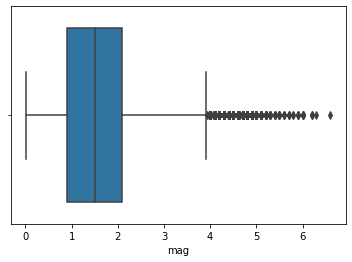

In [ ]:
sns.boxplot(df["mag"])

In [ ]:
df['class'].value_counts()

1.0    8415
2.0     419
3.0      33
Name: class, dtype: int64

In [ ]:
df['mag'].value_counts()

1.60    212
1.50    206
1.40    204
1.30    179
0.85    164
       ... 
2.43      1
3.38      1
4.05      1
3.71      1
2.85      1
Name: mag, Length: 469, dtype: int64

In [ ]:
df = df.drop('place', 1)
df = df.drop('type', 1)
df = df.drop('status', 1)
df = df.drop('locationSource', 1)
df = df.drop('magSource', 1)
df = df.drop('time', 1)
df = df.drop('updated', 1)
df = df.drop('net', 1)
df = df.drop('id', 1)
df = df.drop('magType', 1)

C:\Users\ranea\AppData\Local\Temp/ipykernel_11216/3300883012.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('place', 1)
C:\Users\ranea\AppData\Local\Temp/ipykernel_11216/3300883012.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('type', 1)
C:\Users\ranea\AppData\Local\Temp/ipykernel_11216/3300883012.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('status', 1)
C:\Users\ranea\AppData\Local\Temp/ipykernel_11216/3300883012.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('locationSource', 1)
C:\Users\ranea\AppData\Local\Temp/ipykernel_11216/3300883012.py:5: FutureWarning: In a futu

In [ ]:
df.head()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst,class
0,33.190167,-115.595833,1.78,1.72,21.0,81.0,0.02089,0.19,0.31,0.42,0.129,27.0,1.0
1,61.662800,-150.393800,18.00,1.70,NaN,NaN,NaN,0.34,NaN,0.40,NaN,NaN,1.0
2,33.197333,-115.602500,1.42,1.47,19.0,88.0,0.02200,0.25,0.42,0.59,0.193,27.0,1.0
3,34.067500,-117.259000,10.68,0.95,27.0,71.0,0.12170,0.23,0.35,1.04,0.126,26.0,1.0
4,36.530167,-117.971664,6.81,3.00,45.0,55.0,0.10040,0.24,0.30,0.85,0.268,24.0,1.0


In [ ]:
df['nst'] = df['nst'].replace(np.NaN, df['nst'].mean())
df['gap'] = df['gap'].replace(np.NaN, df['gap'].mean())
df['dmin'] = df['dmin'].replace(np.NaN, df['dmin'].mean())
df['rms'] = df['rms'].replace(np.NaN, df['rms'].mean())
df['horizontalError'] = df['horizontalError'].replace(np.NaN, df['horizontalError'].mean())
df['depthError'] = df['depthError'].replace(np.NaN, df['depthError'].mean())
df['magError'] = df['magError'].replace(np.NaN, df['magError'].mean())
df['magNst'] = df['magNst'].replace(np.NaN, df['magNst'].mean())

In [ ]:
df.isnull().sum()

latitude           0
longitude          0
depth              0
mag                0
nst                0
gap                0
dmin               0
rms                0
horizontalError    0
depthError         0
magError           0
magNst             0
class              0
dtype: int64

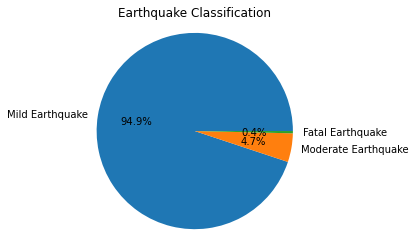

In [ ]:
import matplotlib.pyplot as plt
my_labels = 'Mild Earthquake','Moderate Earthquake','Fatal Earthquake'
plt.pie(df['class'].value_counts(),labels=my_labels,autopct='%1.1f%%')
plt.title('Earthquake Classification')
plt.axis('equal')
plt.show()

In [ ]:
X = df.drop(["class"], axis = 1)
Y = df['class']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

<font size="6">ZeroR/Dummy Classifier</font>

In [ ]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(x_train, y_train)

DummyClassifier(strategy='most_frequent')

In [ ]:
y_pred = dummy_clf.predict(x_test)

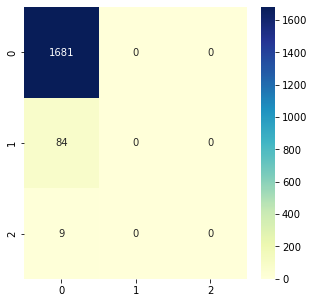

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
plt.subplots(figsize=(5,5))
cm = sns.heatmap(cf_matrix, cmap="YlGnBu", fmt = 'd', annot=True)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.947576099210823


In [ ]:
from sklearn.metrics import precision_score
print(precision_score(y_test,y_pred, average = 'macro'))

0.315858699736941


C:\Users\ranea\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import recall_score
print(recall_score(y_test,y_pred, average = 'macro'))

0.3333333333333333


In [ ]:
from sklearn.metrics import f1_score
print(f1_score(y_test,y_pred, average = 'macro'))

0.3243608297153883


In [ ]:
from sklearn.metrics import matthews_corrcoef
print(matthews_corrcoef(y_test, y_pred, sample_weight=None))

0.0


C:\Users\ranea\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:873: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


<font size="6">Random Forest</font>

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(x_train, y_train);

In [ ]:
y_pred = rf.predict(x_test)

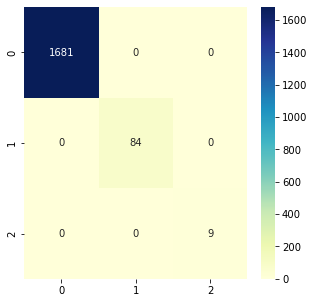

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
plt.subplots(figsize=(5,5))
cm = sns.heatmap(cf_matrix, cmap="YlGnBu", fmt = 'd', annot=True)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

1.0


In [ ]:
from sklearn.metrics import precision_score
print(precision_score(y_test,y_pred, average = 'macro'))

1.0


In [ ]:
from sklearn.metrics import recall_score
print(recall_score(y_test,y_pred, average = 'macro'))

1.0


In [ ]:
from sklearn.metrics import f1_score
print(f1_score(y_test,y_pred, average = 'macro'))

1.0


In [ ]:
from sklearn.metrics import matthews_corrcoef
print(matthews_corrcoef(y_test, y_pred, sample_weight=None))

1.0


<font size="6">Logistic Regression</font>

In [ ]:
#scaling before applying logistic regression
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(x_train)
X_testscaled=sc_X.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logreg.fit(X_trainscaled, y_train)

C:\Users\ranea\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [ ]:
y_pred = logreg.predict(X_testscaled)

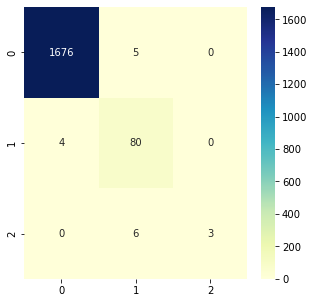

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
plt.subplots(figsize=(5,5))
cm = sns.heatmap(cf_matrix, cmap="YlGnBu", fmt = 'd', annot=True)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9915445321307779


In [ ]:
from sklearn.metrics import precision_score
print(precision_score(y_test,y_pred, average = 'macro'))

0.958913308913309


In [ ]:
from sklearn.metrics import recall_score
print(recall_score(y_test,y_pred, average = 'macro'))

0.7609132885753945


In [ ]:
from sklearn.metrics import f1_score
print(f1_score(y_test,y_pred, average = 'macro'))

0.803869313271277


In [ ]:
from sklearn.metrics import matthews_corrcoef
print(matthews_corrcoef(y_test, y_pred, sample_weight=None))

0.915741368172741


<font size="6">Decision Tree</font>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
dt = DecisionTreeClassifier()
dt = dt.fit(x_train,y_train)

In [ ]:
y_pred = dt.predict(x_test)

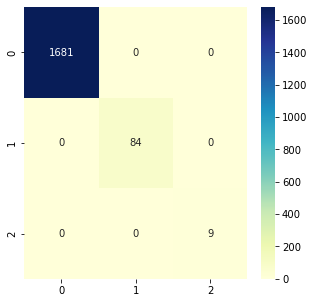

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
plt.subplots(figsize=(5,5))
cm = sns.heatmap(cf_matrix, cmap="YlGnBu", fmt = 'd', annot=True)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

1.0


In [ ]:
from sklearn.metrics import precision_score
print(precision_score(y_test,y_pred, average = 'macro'))

1.0


In [ ]:
from sklearn.metrics import recall_score
print(recall_score(y_test,y_pred, average = 'macro'))

1.0


In [ ]:
from sklearn.metrics import f1_score
print(f1_score(y_test,y_pred, average = 'macro'))

1.0


In [ ]:
from sklearn.metrics import matthews_corrcoef
print(matthews_corrcoef(y_test, y_pred, sample_weight=None))

1.0


<font size="6">Linear Model Tree</font>

In [ ]:
from sklearn.linear_model import RidgeClassifier
from lineartree import LinearTreeClassifier
lmt = LinearTreeClassifier(base_estimator=RidgeClassifier())
lmt.fit(X_trainscaled, y_train)

LinearTreeClassifier(base_estimator=RidgeClassifier())

In [ ]:
y_pred = lmt.predict(X_testscaled)

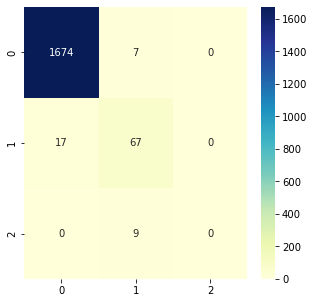

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
plt.subplots(figsize=(5,5))
cm = sns.heatmap(cf_matrix, cmap="YlGnBu", fmt = 'd', annot=True)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9813979706877114


In [ ]:
from sklearn.metrics import precision_score
print(precision_score(y_test,y_pred, average = 'macro'))

0.5990585642392159


C:\Users\ranea\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import recall_score
print(recall_score(y_test,y_pred, average = 'macro'))

0.5978182865452348


In [ ]:
from sklearn.metrics import f1_score
print(f1_score(y_test,y_pred, average = 'macro'))

0.5984259239528061


In [ ]:
from sklearn.metrics import matthews_corrcoef
print(matthews_corrcoef(y_test, y_pred, sample_weight=None))

0.8047626522570032


In [ ]:
from matplotlib import pyplot as plt
from matplotlib import style

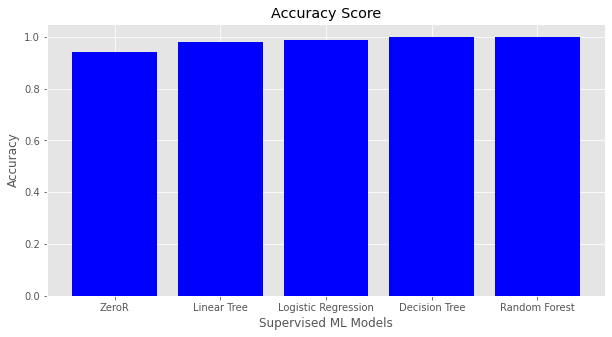

In [ ]:
from matplotlib import pyplot as plt
Names = ['ZeroR','Linear Tree','Logistic Regression','Decision Tree','Random Forest']
Marks = [0.94,0.98,0.99,1,1]
plt.figure(figsize = (10, 5))
plt.bar(Names,Marks,color = 'blue')
plt.title('Accuracy Score')
plt.xlabel('Supervised ML Models')
plt.ylabel('Accuracy')
plt.show()

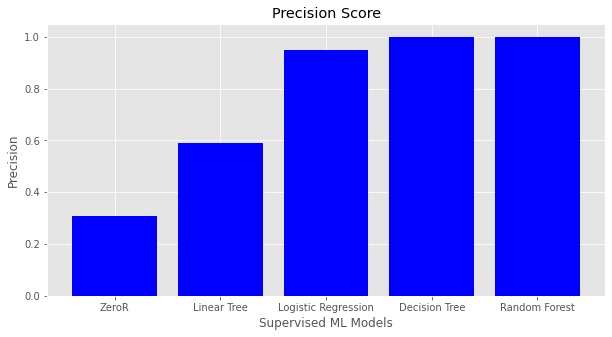

In [ ]:
from matplotlib import pyplot as plt
Names = ['ZeroR','Linear Tree','Logistic Regression','Decision Tree','Random Forest']
Marks = [0.31,0.59,0.95,1,1]
plt.figure(figsize = (10, 5))
plt.bar(Names,Marks,color = 'blue')
plt.title('Precision Score')
plt.xlabel('Supervised ML Models')
plt.ylabel('Precision')
plt.show()

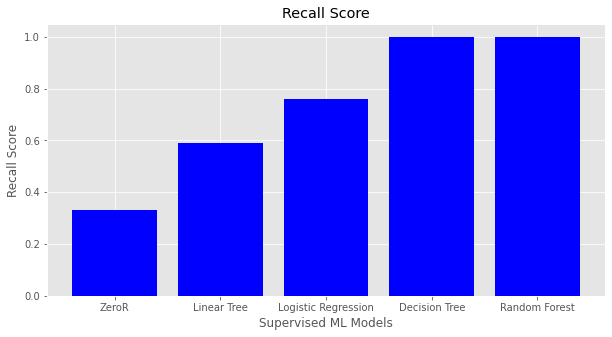

In [ ]:
from matplotlib import pyplot as plt
Names = ['ZeroR','Linear Tree','Logistic Regression','Decision Tree','Random Forest']
Marks = [0.33,0.59,0.76,1,1]
plt.figure(figsize = (10, 5))
plt.bar(Names,Marks,color = 'blue')
plt.title('Recall Score')
plt.xlabel('Supervised ML Models')
plt.ylabel('Recall Score')
plt.show()

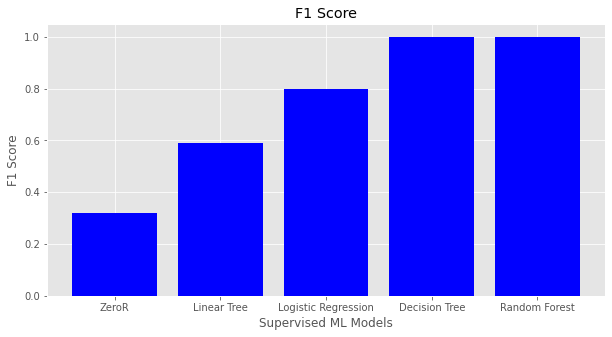

In [ ]:
from matplotlib import pyplot as plt
Names = ['ZeroR','Linear Tree','Logistic Regression','Decision Tree','Random Forest']
Marks = [0.32,0.59,0.80,1,1]
plt.figure(figsize = (10, 5))
plt.bar(Names,Marks,color = 'blue')
plt.title('F1 Score')
plt.xlabel('Supervised ML Models')
plt.ylabel('F1 Score')
plt.show()

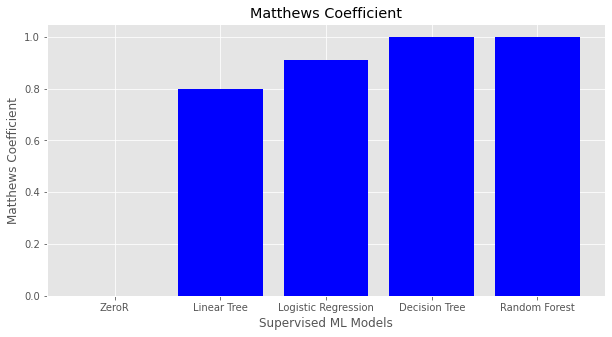

In [ ]:
from matplotlib import pyplot as plt
Names = ['ZeroR','Linear Tree','Logistic Regression','Decision Tree','Random Forest']
Marks = [0,0.80,0.91,1,1]
plt.figure(figsize = (10, 5))
plt.bar(Names,Marks,color = 'blue')
plt.title('Matthews Coefficient')
plt.xlabel('Supervised ML Models')
plt.ylabel('Matthews Coefficient')
plt.show()